In [40]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [41]:
train = pd.read_csv("train_model.csv")

In [42]:
test = pd.read_csv("test_model.csv")

In [43]:
solt = pd.read_csv('solution.csv')

In [44]:
train.shape

(58857, 13)

In [45]:
test.shape

(19609, 12)

In [46]:
train.head()

,x1,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x18
0,1,3850.0,3,2004,2,94,20,50000.0,7,7,33,1,34474
1,2,5999.0,0,2007,2,140,160,150000.0,5,2,36,1,50765
2,3,5990.0,7,2007,1,150,54,150000.0,2,2,20,1,90475
3,4,4000.0,7,2005,2,150,1,150000.0,9,2,0,1,40699
4,5,12950.0,0,2005,2,200,24,125000.0,3,7,1,1,84347


In [47]:
test.head()

,x1,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x18
0,60001,8,2004,1,163,110,125000.0,8,2,14,0,90480
1,60002,0,2004,2,131,160,150000.0,2,0,36,1,90762
2,60003,8,2011,2,190,150,70000.0,3,2,23,1,4177
3,60004,4,2007,2,136,55,150000.0,6,2,10,1,88361
4,60005,0,2002,1,193,13,150000.0,9,2,2,2,73765


In [53]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [78]:
#Define target and ID columns:
target = 'y'
IDcol = ['x1']
from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("MAE : %.4g" % metrics.mean_absolute_error(dtrain[target].values, dtrain_predictions))
    print("MSE : %.4g" % metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    print('MAPE: ' + mean_absolute_percentage_error(dtrain[target].values, dtrain_predictions).astype(str))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)




predictors :  ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x18']

Model Report
RMSE : 4698
MAE : 3237
MAE: 3236.7571930598474
MSE: 22067387.426414657
RMSE : 4698
RMSE:4697.593791124841
MAPE: 67.95867954591488


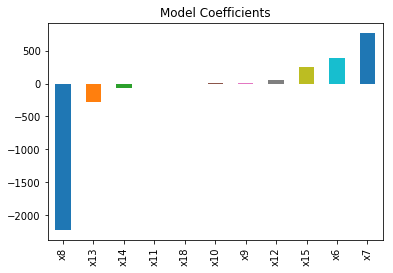

In [76]:
from sklearn.linear_model import LinearRegression
predictors = [x for x in train.columns if x not in [target]+IDcol]
print("predictors : ",predictors)
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'LR.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

predictors :  ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x18']

Model Report
RMSE : 4869
MAE : 3350
MSE : 2.371e+07
MAPE: 70.1185248428565


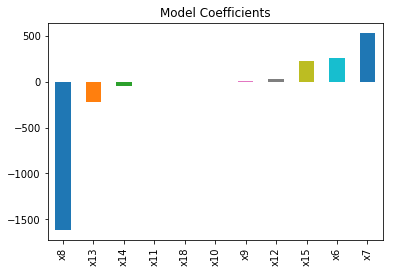

In [79]:
from sklearn.linear_model import Ridge
predictors = [x for x in train.columns if x not in [target]+IDcol]
print("predictors : ",predictors)
# print predictors
alg1 = Ridge(alpha = 0.5,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'L_rid.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 4750
MAE : 3232
MSE : 2.256e+07
MAPE: 65.95517681437154


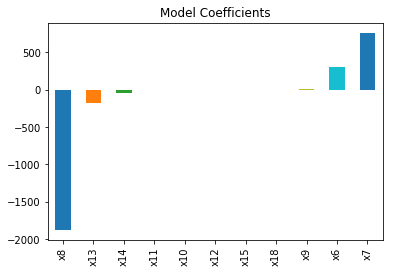

In [80]:
from sklearn.linear_model import Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = Lasso(alpha = 1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res4.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg1, train, test, predictors, target, IDcol, 'DT.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 2929
MAE : 1830
MSE : 8.577e+06
MAPE: 31.161513690749192


In [83]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = RandomForestRegressor(n_estimators=200,max_depth=15, min_samples_leaf=100)
modelfit(alg1, train, test, predictors, target, IDcol, 'RF.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 2866
MAE : 1788
MSE : 8.213e+06
MAPE: 31.400566395362496
